# Machine Learning Model Implementations
This file includes machine learning model implementations and optimization steps.
The models used in order is as follows:
1. KNN classifier
2. ...


### Import Packages and Load Dataset

Labels come from 2 different PSG systems: Remlogic and Somnomedics. Sleep stage labels are as follows:

0 = Awake = SLEEP-S0 \
1 = REM   = SLEEP-REM \
2 = Light = SLEEP-S1 and  SLEEP-S2 \
3 = Deep  = SLEEP-S3 

EMFIT is the piezoelectric mat and Somnofy is the radar.

In [1]:
import seaborn as sn
import matplotlib.pyplot as plt
# i put the following in results.py:
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import CategoricalNB

import numpy as np
from loader import *
from plot import *
from results import *
from sklearn.model_selection import train_test_split

In [2]:
subjectID = PARTICIPANT_IDS[1]
sleep_stages = read_patient_data(subjectID)

In [3]:
labels = sleep_stages["sleep_stage_num_psg"]
features = sleep_stages.drop(columns="sleep_stage_num_psg")
size = sleep_stages.shape[0]
divide_ind = int(size*.7)

In [4]:
print("Radar: ", balanced_accuracy_score( labels[:divide_ind], sleep_stages["sleep_stage_num_somnofy"][:divide_ind]))
print("Mat: ", balanced_accuracy_score( labels[:divide_ind], sleep_stages["sleep_stage_num_emfit"][:divide_ind]))

Radar:  0.45474044012102816
Mat:  0.5013282629573407


<AxesSubplot:xlabel='timestamp_local'>

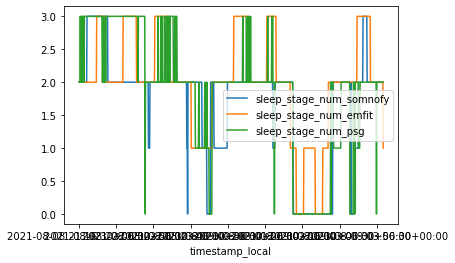

In [5]:
sleep_stages.plot()

In [8]:
_, _, _, x, y = get_nn_patients()
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.30, random_state=42)
x_tr.shape, x_te.shape, y_tr.shape, y_te.shape

((35, 857, 2), (15, 857, 2), (35, 857), (15, 857))

In [12]:
x_tr, x_te, y_tr, y_te = x_tr.reshape(29995,2), x_te.reshape(12855,2), y_tr.ravel(), y_te.ravel()

### KNN Classifier

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=10)

In [22]:
preds = knn_classifier.predict(x_te)

0.2679169324876502
[[0.20824582 0.00108907 0.02543757 0.        ]
 [0.07763516 0.00715675 0.06830027 0.        ]
 [0.40614547 0.00427849 0.06565539 0.        ]
 [0.12640996 0.00054454 0.00910152 0.        ]]


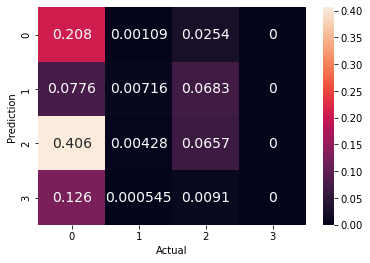

In [23]:
# Accuracy score 
print(balanced_accuracy_score( y_te, preds))

# Confusion Matrix and Classification Report 
plot_conf_matrix(preds, y_te, normalize = True)
# print(classification_report( y_te, preds))

### Naive Bayes 

In [17]:
cnb_classifier = CategoricalNB()
cnb_classifier.fit(x_tr, y_tr)

CategoricalNB()

In [18]:
preds = cnb_classifier.predict(x_te)

0.5759579664583413
[[0.1504473  0.02917153 0.04550758 0.00964605]
 [0.04309607 0.0789576  0.03010502 0.00093349]
 [0.07374562 0.0613769  0.29848308 0.04247375]
 [0.01330222 0.00295605 0.04900817 0.07078958]]


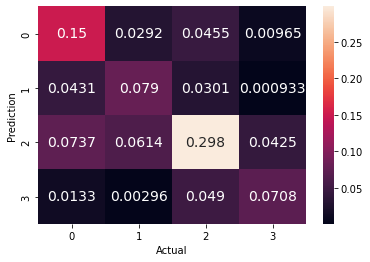

In [19]:
# Accuracy score 
print(balanced_accuracy_score( y_te, preds))

# Confusion Matrix and Classification Report 
plot_conf_matrix(preds, y_te, normalize = True)
# print(classification_report( y_te, preds))

### Overall Balanced accuracy


In [20]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    overall_balanced_accuracy()

Radar:   Acc =  0.5890376474187747 St. Dv. =  0.1805266427884278
Mat:   Acc =  0.37047027665760657 St. Dv. =  0.10266745272149581
kNN:   Acc =  0.42412158601351024 St. Dv. =  0.14730997269717408
NB:   Acc =  0.4772134774112359 St. Dv. =  0.1600312903460696
